# **1. Perkenalan Dataset**


Dataset yang digunakan dalam proyek ini diperoleh dari Kaggle dengan judul ["Air Quality and Pollution Assessment"](https://www.kaggle.com/datasets/mujtabamatin/air-quality-and-pollution-assessment). Kumpulan data ini berisi 5000 sampel dan mencakup faktor lingkungan dan demografi penting yang memengaruhi tingkat polusi. Dataset terdiri dari 10 variabel dimana 9 variabel merupakan variabel prediktor dan 1 variabel (Air Quality) merupakan variabel target. 9 variabel prediktor digunakan untuk membangun model **klasifikasi** Air Quality.

**Variabel pada Air Quality and Pollution Assessment dataset adalah sebagai berikut**

- temperature : menyatakan rata-rata suhu udara (°C) di suatu wilayah.
- humidity : menyatakan kelembapan relatif (%) yang tercatat di wilayah tersebut.
- PM2.5 : menyatakan kadar partikulat halus (PM2.5) di udara (µg/m³).
- PM10 : menyatakan kadar partikulat kasar (PM10) di udara (µg/m³).
- NO2 : menyatakan kadar nitrogen dioksida (ppb).
- SO2 : menyatakan kadar sulfur dioksida (ppb).
- CO : menyatakan kadar karbon monoksida (ppm).
- proximity_to_industrial_area : menyatakan jarak (dalam kilometer) ke kawasan industri terdekat.
- population_density : menyatakan kepadatan penduduk (jumlah orang per km²) di wilayah tersebut.
- air_quality **(variabel target)** : menyatakan tingkat kualitas udara dengan 4 kategori, yaitu:
  - Good: Udara bersih dengan tingkat polusi rendah.
  - Moderate: Udara yang masih dapat diterima meskipun ada polutan tertentu.
  - Poor: Udara dengan tingkat polusi yang dapat menyebabkan masalah kesehatan pada kelompok sensitif.
  - Hazardous: Udara sangat tercemar yang berpotensi membahayakan kesehatan masyarakat.


# **2. Import Library**

Pada awalnya, semua packages/library dimuat untuk membantu melakukan analisis:

In [2]:
# Library dasar python
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Library untuk visualisasi
import seaborn as sns
import matplotlib.pyplot as plt

# Library untuk preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [3]:
# Impor dataset
df=pd.read_csv('../pollution_dataset_raw.csv')
df

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
0,29.8,59.1,5.2,17.9,18.9,9.2,1.72,6.3,319,Moderate
1,28.3,75.6,2.3,12.2,30.8,9.7,1.64,6.0,611,Moderate
2,23.1,74.7,26.7,33.8,24.4,12.6,1.63,5.2,619,Moderate
3,27.1,39.1,6.1,6.3,13.5,5.3,1.15,11.1,551,Good
4,26.5,70.7,6.9,16.0,21.9,5.6,1.01,12.7,303,Good
...,...,...,...,...,...,...,...,...,...,...
4995,40.6,74.1,116.0,126.7,45.5,25.7,2.11,2.8,765,Hazardous
4996,28.1,96.9,6.9,25.0,25.3,10.8,1.54,5.7,709,Moderate
4997,25.9,78.2,14.2,22.1,34.8,7.8,1.63,9.6,379,Moderate
4998,25.3,44.4,21.4,29.0,23.7,5.7,0.89,11.6,241,Good


In [4]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    5000 non-null   float64
 1   Humidity                       5000 non-null   float64
 2   PM2.5                          5000 non-null   float64
 3   PM10                           5000 non-null   float64
 4   NO2                            5000 non-null   float64
 5   SO2                            5000 non-null   float64
 6   CO                             5000 non-null   float64
 7   Proximity_to_Industrial_Areas  5000 non-null   float64
 8   Population_Density             5000 non-null   int64  
 9   Air Quality                    5000 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 390.8+ KB


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [5]:
df.describe(include='all')

,Temperature,Humidity,PM2.5,PM10,NO2,SO2,CO,Proximity_to_Industrial_Areas,Population_Density,Air Quality
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Good
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000
mean,30.029020,70.056120,20.142140,30.218360,26.412100,10.014820,1.500354,8.425400,497.423800,NaN
std,6.720661,15.863577,24.554546,27.349199,8.895356,6.750303,0.546027,3.610944,152.754084,NaN
min,13.400000,36.000000,0.000000,-0.200000,7.400000,-6.200000,0.650000,2.500000,188.000000,NaN
25%,25.100000,58.300000,4.600000,12.300000,20.100000,5.100000,1.030000,5.400000,381.000000,NaN
50%,29.000000,69.800000,12.000000,21.700000,25.300000,8.000000,1.410000,7.900000,494.000000,NaN
75%,34.000000,80.300000,26.100000,38.100000,31.900000,13.725000,1.840000,11.100000,600.000000,NaN


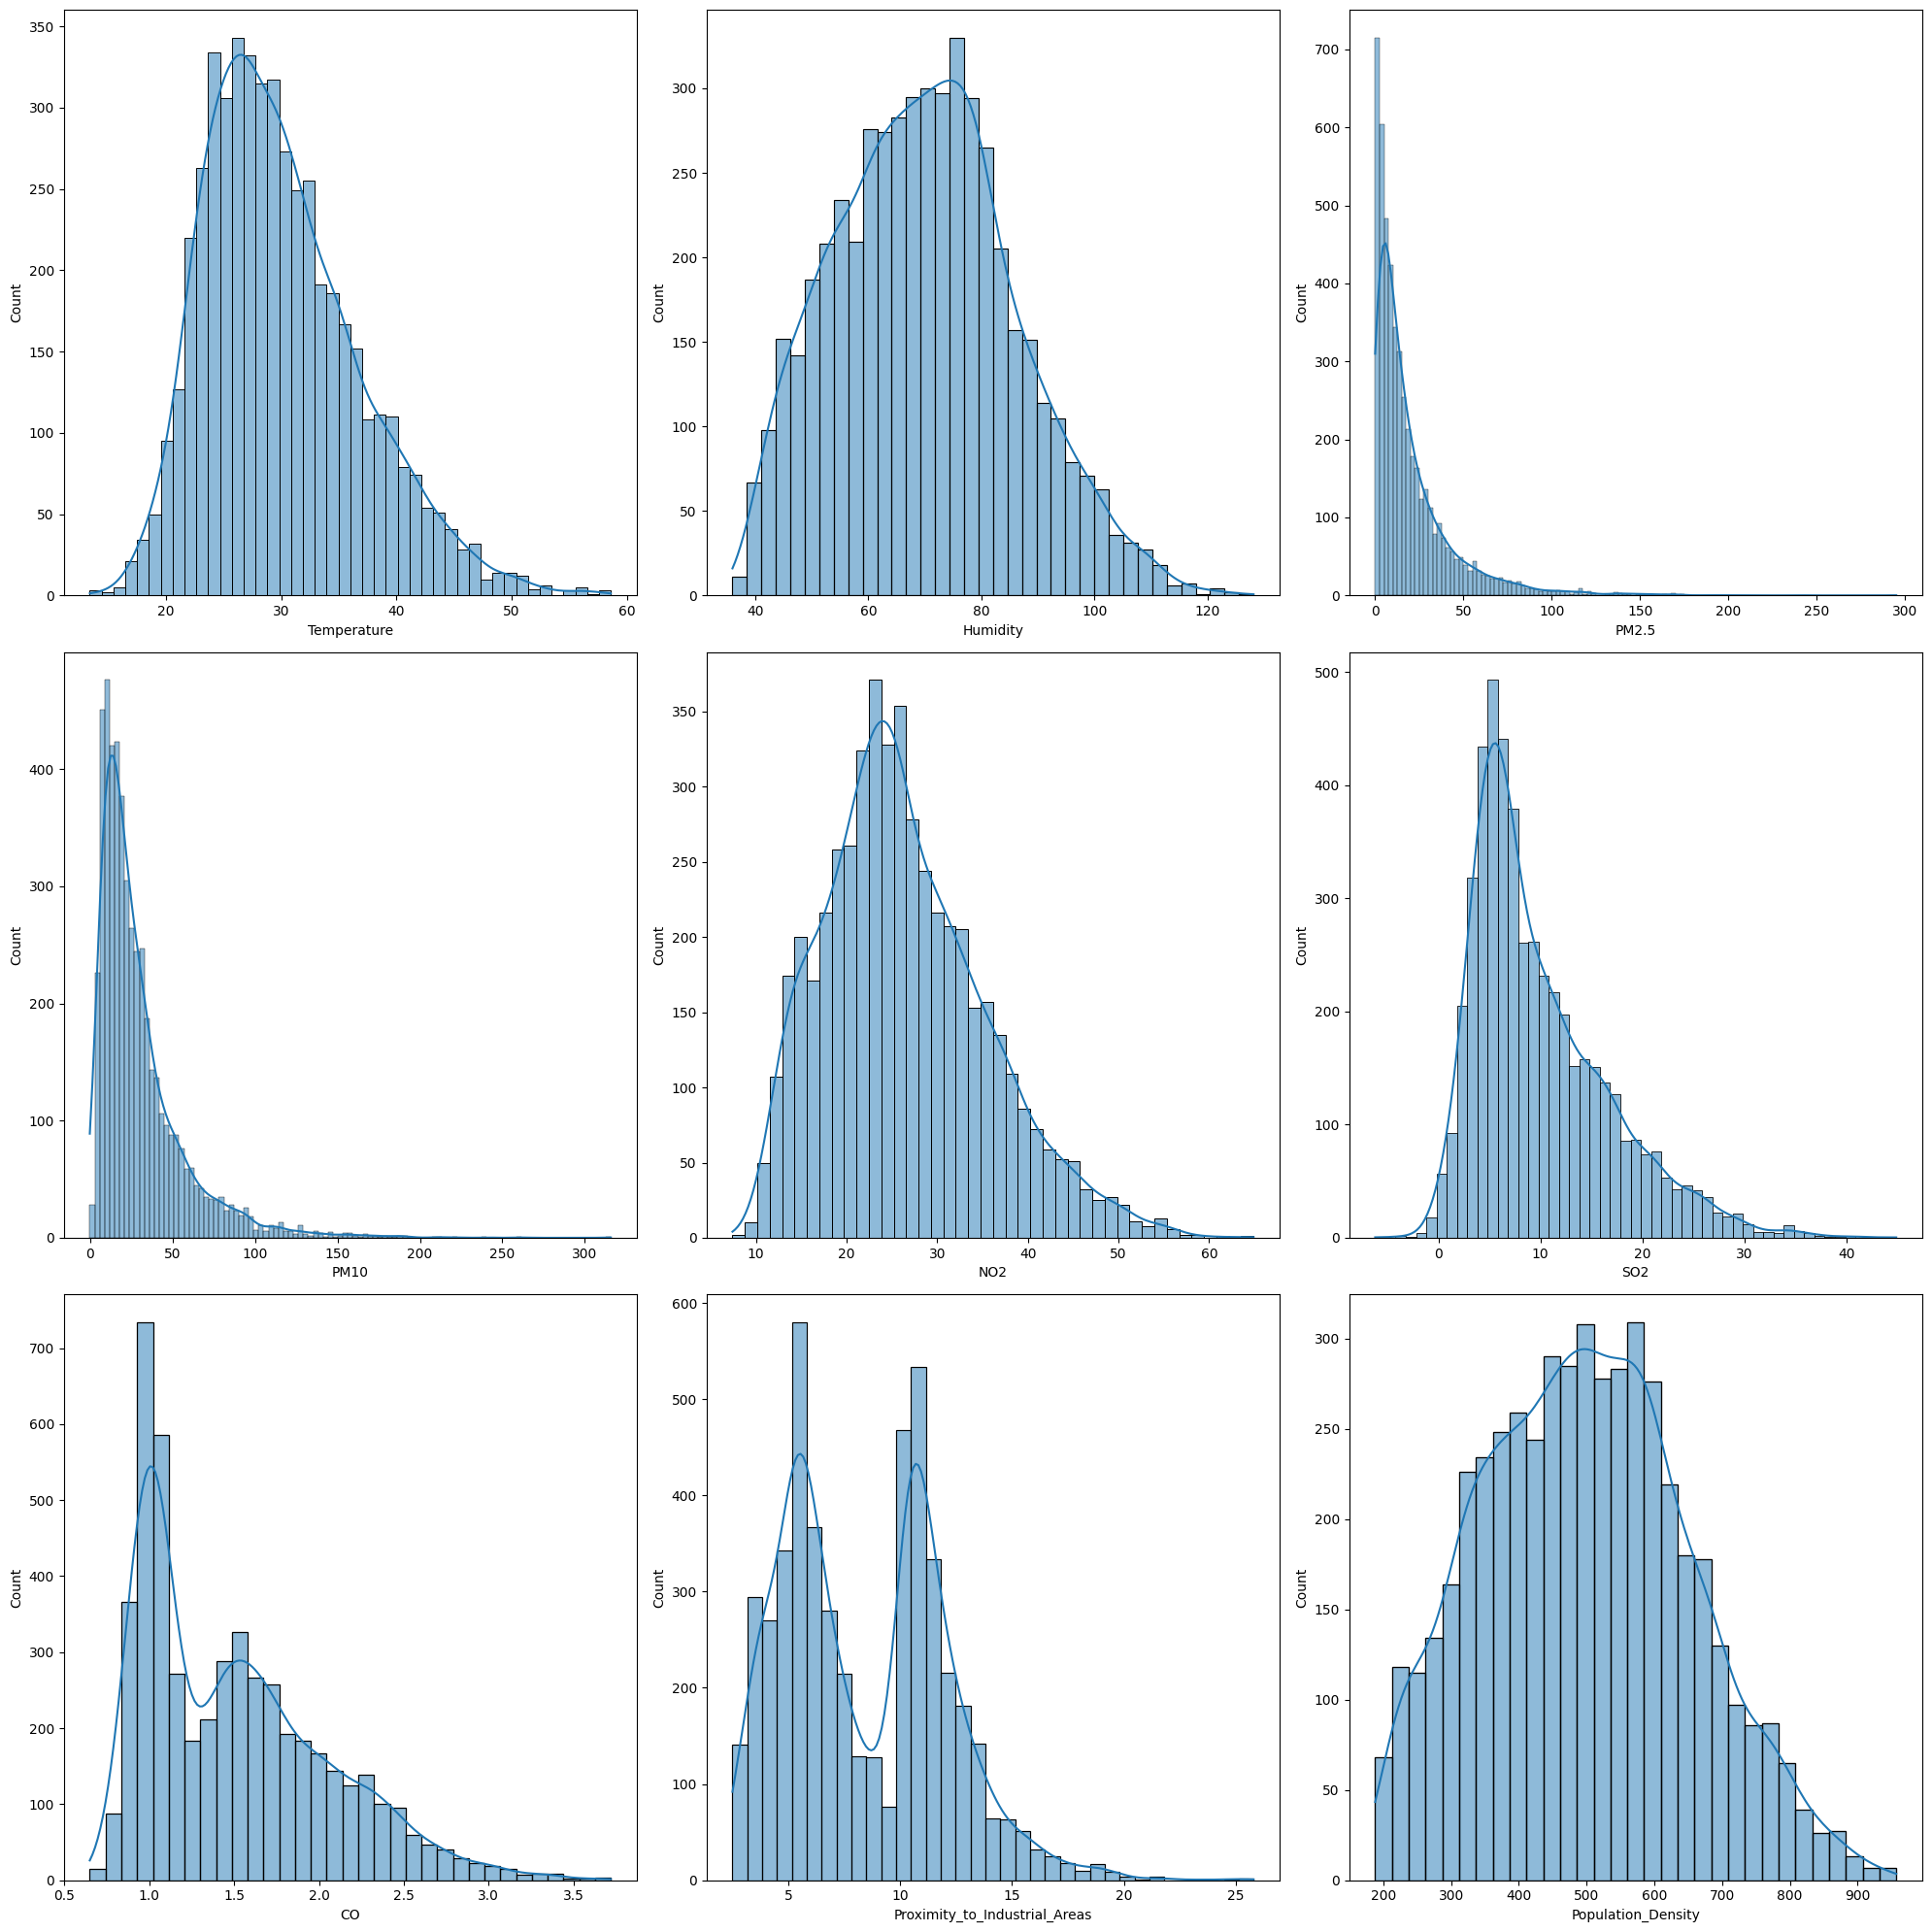

In [6]:
# Membuat visualisasi distribusi seluruh variabel prediktor
fig,ax=plt.subplots(3,3,figsize=(20,20))
ax=ax.flatten()
i=0

for col in df.columns:
    if(col!='Air Quality'):
        sns.histplot(data=df,x=col,kde=True,ax=ax[i])
        i+=1
plt.tight_layout()

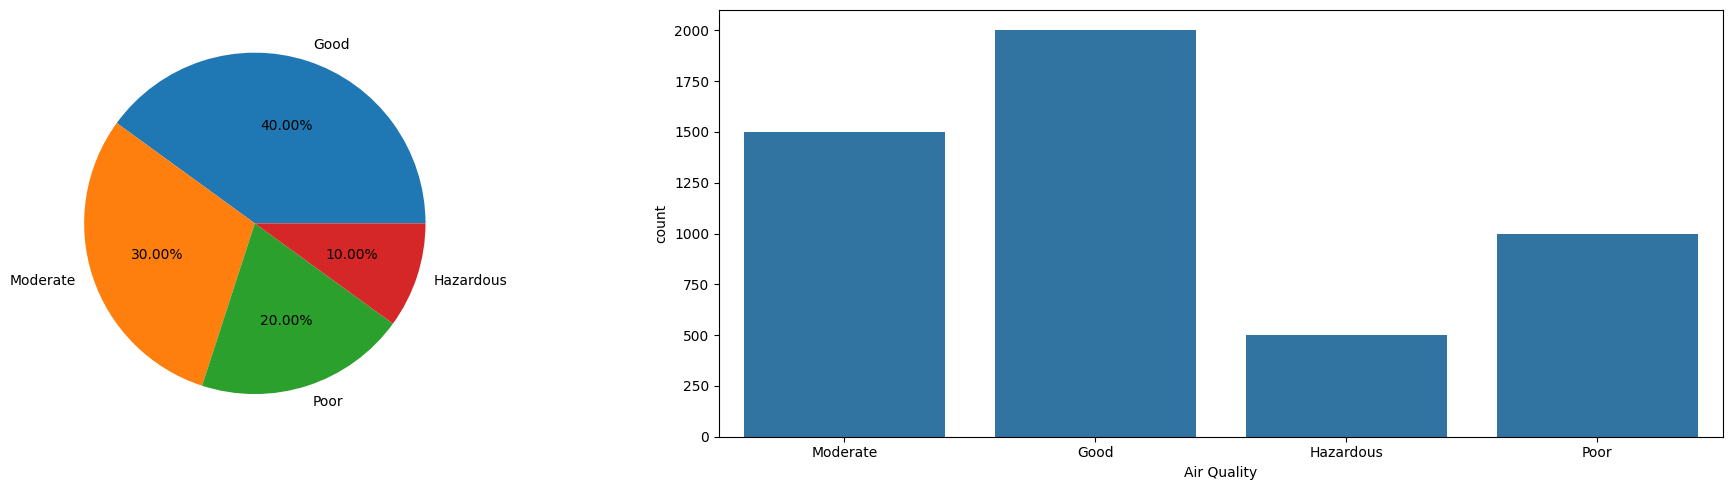

In [7]:
# Membuat visualisasi distribusi variabel target
fig,ax=plt.subplots(1,2,figsize=(20,5))

tdf=df['Air Quality'].value_counts().reset_index()
ax[0].pie(tdf['count'],labels=tdf[col],autopct='%.2f%%')
ax[0].set_aspect('equal')
sns.countplot(data=df,x=col,ax=ax[1])
plt.tight_layout()
plt.show()

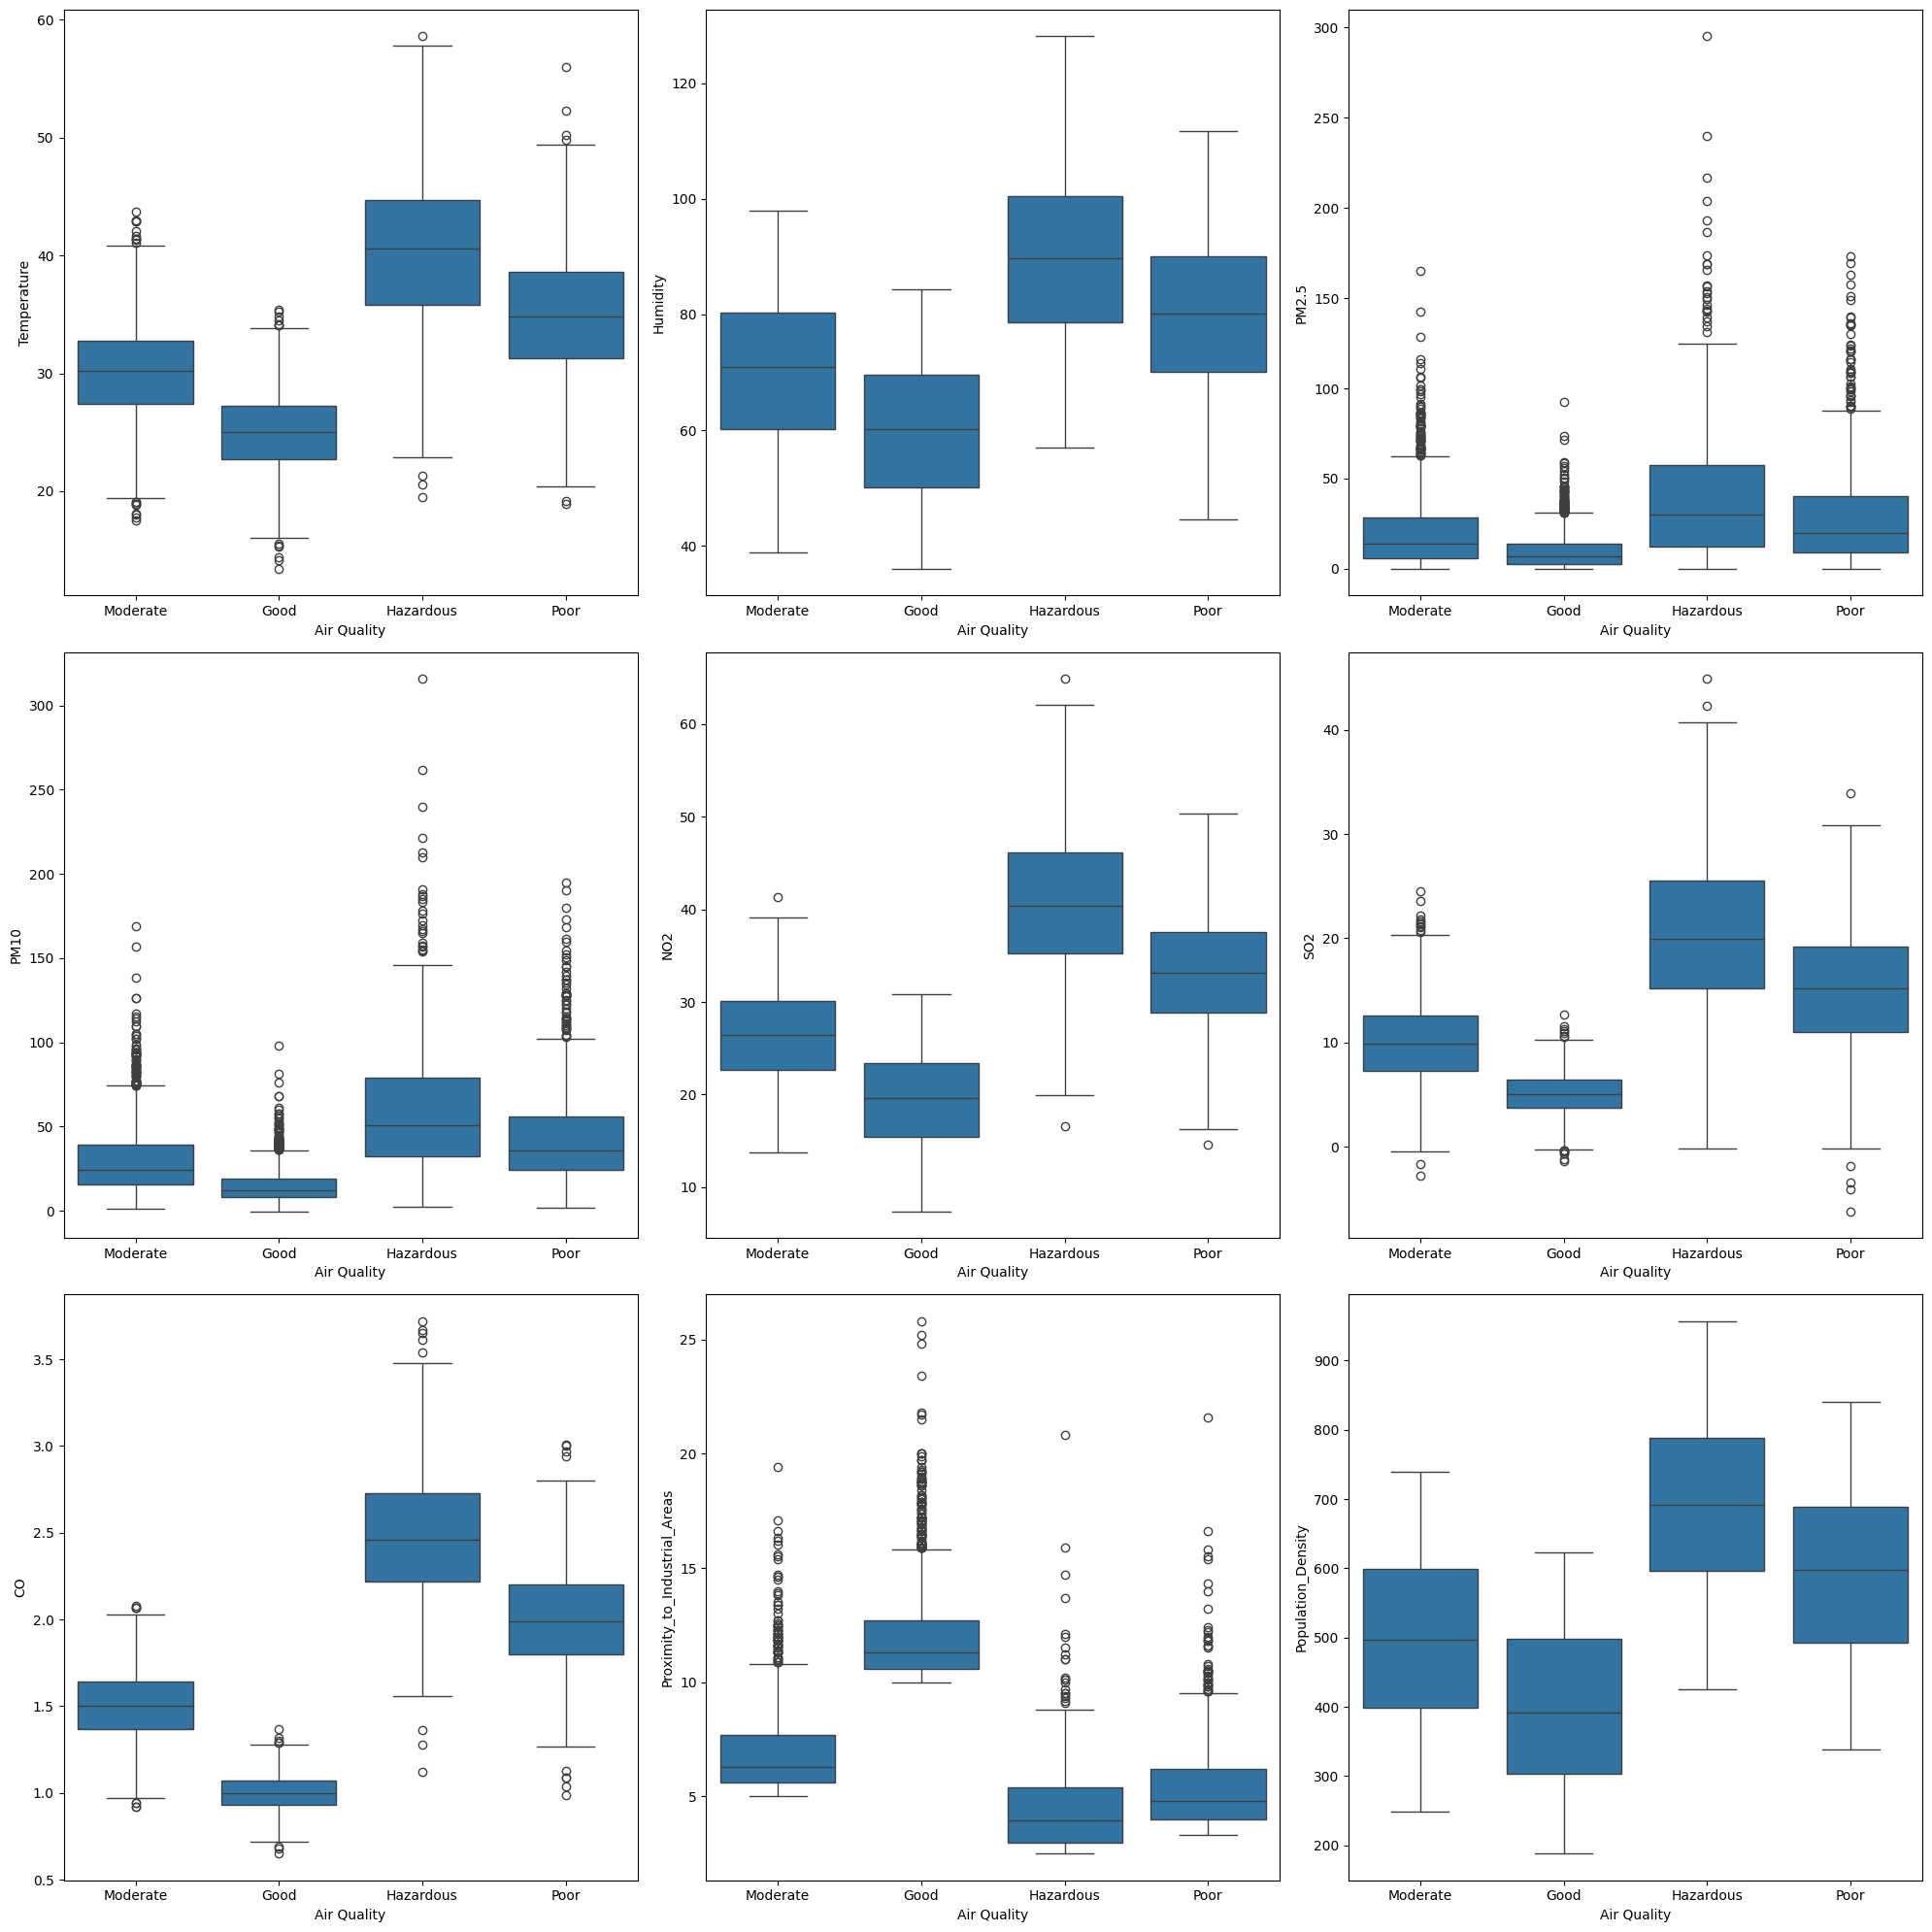

In [8]:
# Identifikasi awal pengaruh masing masing variabel prediktor terhadap variabel target
fig, ax = plt.subplots(3, 3, figsize=(20, 20))
ax = ax.flatten()
i = 0
cols=df.drop(columns='Air Quality')
for col in cols:
    sns.boxplot(data=df, x='Air Quality', y=col, ax=ax[i])
    i += 1
plt.tight_layout()
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

## Penanganan Outlier

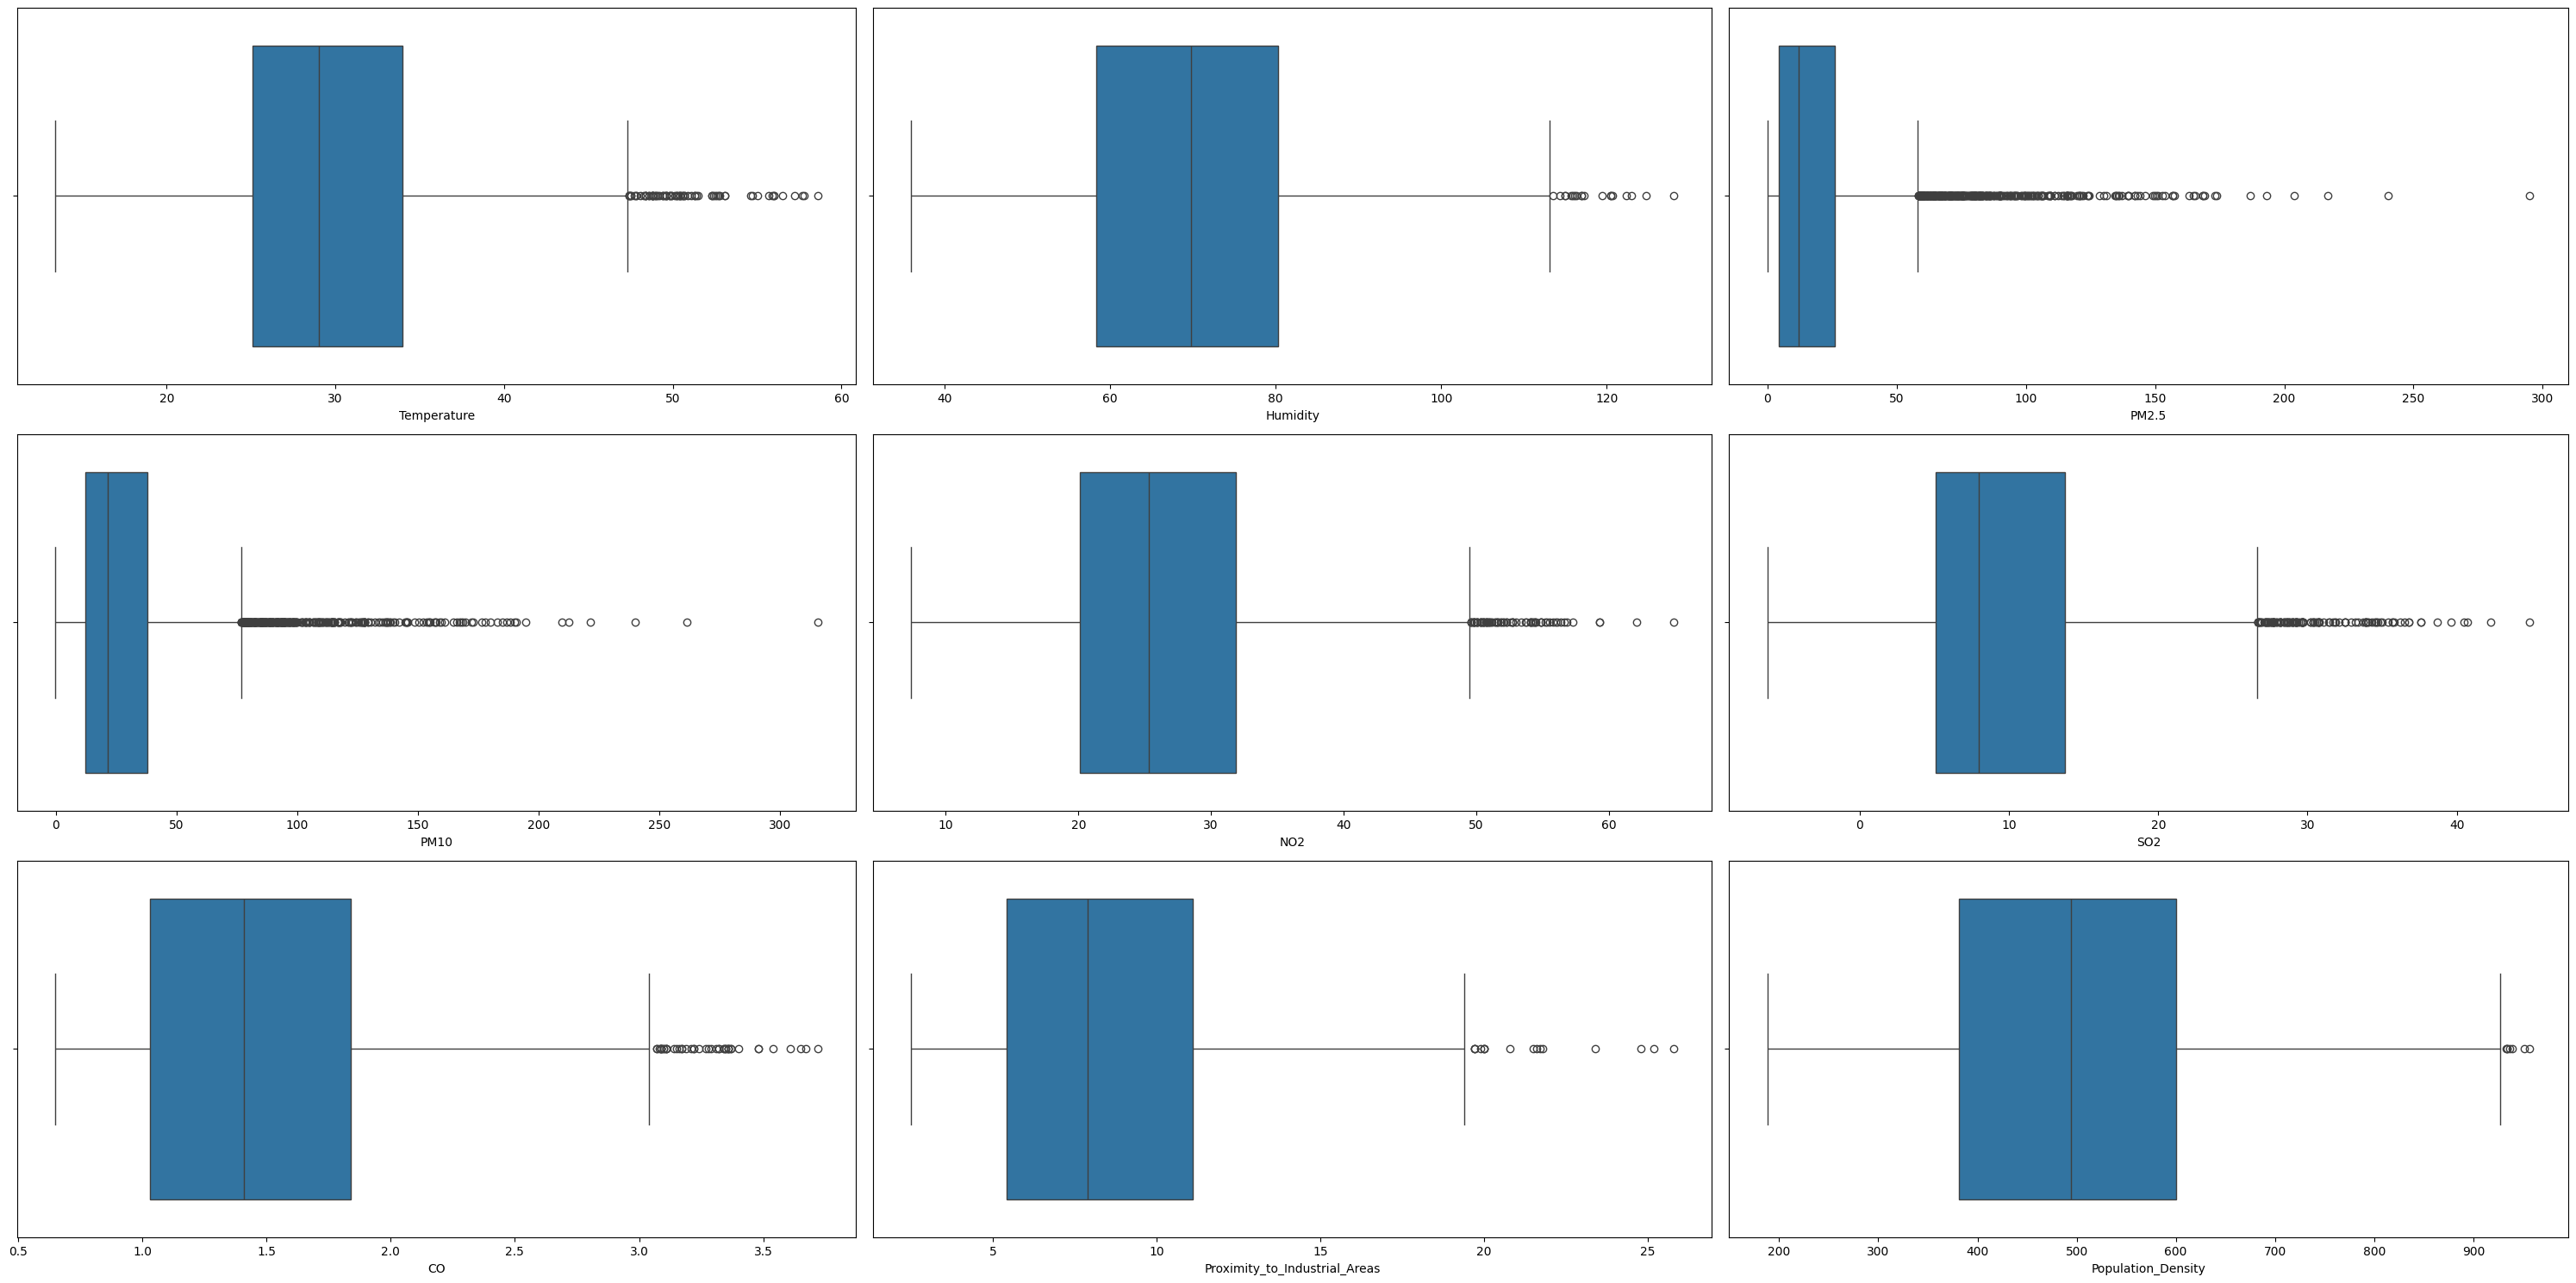

In [9]:
# Checking outlier menggunakan boxplot
fig,ax=plt.subplots(3,3,figsize=(30,15))
ax=ax.flatten()
i=0

for col in df.columns:
    if col!='Air Quality' and i<9:
        sns.boxplot(data=df,x=col,ax=ax[i])
        i+=1

plt.tight_layout()
plt.show()

In [10]:
# Penanganan outlier dengan IQR
for col in df.drop(columns='Air Quality').columns:
    q1=np.quantile(df[col],0.25)
    q3=np.quantile(df[col],0.75)
    iqr=q3-q1
    lb=q1-iqr*1.5
    ub=q3+iqr*1.5
    df=df[(df[col]>=lb)&(df[col]<=ub)]

In [11]:
# Cek kondisi dataset setelah penanganan outlier
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4158 entries, 0 to 4998
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Temperature                    4158 non-null   float64
 1   Humidity                       4158 non-null   float64
 2   PM2.5                          4158 non-null   float64
 3   PM10                           4158 non-null   float64
 4   NO2                            4158 non-null   float64
 5   SO2                            4158 non-null   float64
 6   CO                             4158 non-null   float64
 7   Proximity_to_Industrial_Areas  4158 non-null   float64
 8   Population_Density             4158 non-null   int64  
 9   Air Quality                    4158 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 357.3+ KB


**Penjelasan:**

Berdasarkan EDA pada tahap sebelumnya didapatkan indikasi keberadaan outlier, oleh karena itu dilakukan pengecekan outlier dengan boxplot. Didapatkan bahwa terdapat outlier pada semua variabel, sehingga perlu dilakukan penanganan.

Penanganan outlier pada dataset tersebut dilakukan menggunakan metode Interquartile Range (IQR), yang merupakan pendekatan statistik umum untuk mendeteksi dan menghapus nilai-nilai pencilan (outlier). Dalam proses ini, untuk setiap kolom numerik (kecuali kolom 'Air Quality'), dihitung kuartil pertama (Q1) dan kuartil ketiga (Q3). Selanjutnya dihitung IQR sebagai selisih antara Q3 dan Q1. Batas bawah (lower bound) dan batas atas (upper bound) kemudian ditentukan dengan rumus Q1 - 1.5IQR dan Q3 + 1.5IQR. Data yang berada di luar rentang ini dianggap sebagai outlier dan dihapus dari DataFrame. 

Setelah langkah tersebut, berdasarkan hasil akhir dari df.info(), didapatkan jumlah data sebanyak 4158 baris, yang menunjukkan bahwa proses filter berhasil menghapus baris outlier sebanyak 842 baris.

## Encoding Variabel Target

In [12]:
# Encode variabel target menggunakan label encoder
le=LabelEncoder()
df['Air Quality']=le.fit_transform(df['Air Quality'])

**Penjelasan:**

Untuk keperluan modelling perlu dilakukan encoding variabel target yang bertipe kategorik menjadi numerik menggunakan Label Encoder

## Splitting dan Standarisasi Dataset

In [13]:
x=df.drop(columns='Air Quality')
y=df['Air Quality']

# Membagi data menjadi train dan test
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

**Penjelasan:**

Fitur-fitur (variabel independen) dipisahkan dari target ('Air Quality') untuk membedakan input dan output model. Selanjutnya, data dibagi menjadi data latih (train) dan data uji (test) dengan proporsi 80:20 menggunakan stratified sampling agar distribusi kelas target tetap seimbang pada kedua subset.